In [1]:
%matplotlib inline
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from IPython.core.display import clear_output

from imports import *
from functions import *

In [73]:
# preprocessing
def normalize_size(img):
    """change proportions to 3:2"""
    #todo: vertical images!!!
    h, w, _ = img.shape
    img_cropped = img
    print(w/h)
    if w/h > 3/2 + 0.1: # zbyt panoramiczne
        #cut both sides
        new_w = 3*h/2
        delta = int((w - new_w)/2)
        img_cropped = img[: , delta:w-delta, :]
    elif w/h < 3/2 - 0.1: # za wysokie
        #cut the top and the bottom
        new_h = int((2*w)/3)
        delta = int((h - new_h)/2)
        img_cropped = img[delta:h-delta , :, :]
        
    """change dpi"""
    img_cropped = cv2.resize(img_cropped, (900,600))

    return img_cropped

1.3333333333333333


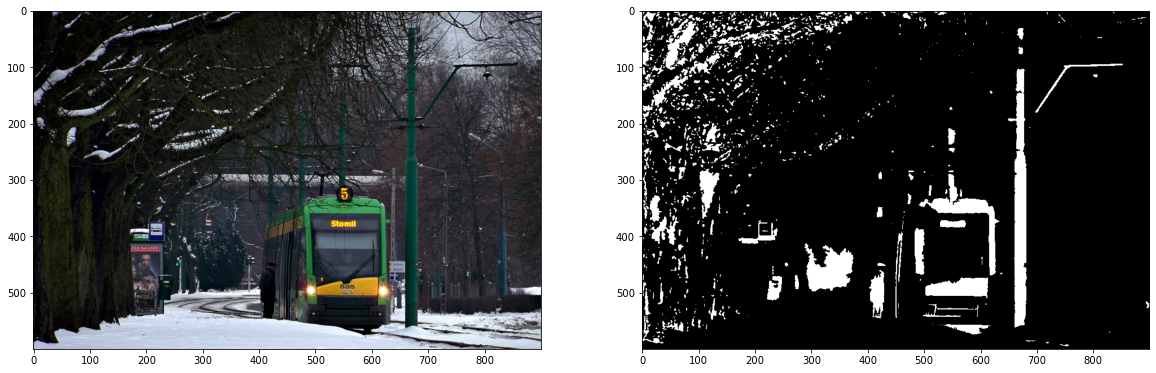

In [82]:
img = imread("dane/5_07.jpg")
img = normalize_size(img)

img_sat = rgb2hsv(img)[:,:,1]

segmentated = segmentate_watershed(img_sat)
show(img, segmentated)

max: 1456 
min: 51 
średnia: 219.7340425531915 
mediana:  103.0 
std:  278.7931123241793 

[71.  8.  1.  4.  3.  3.  0.  2.  1.  1.] [  51.   191.5  332.   472.5  613.   753.5  894.  1034.5 1175.  1315.5
 1456. ]


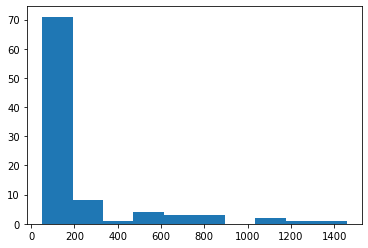

In [83]:
label_objects, nb_labels = ndi.label(segmentated)
sizes = np.bincount(label_objects.ravel())
sizes = sizes[np.logical_and(sizes<1500, sizes>50)]
print("max:", max(sizes), "\nmin:", min(sizes), "\nśrednia:", np.mean(sizes), "\nmediana: ", np.median(sizes), "\nstd: ", np.std(sizes), "\n")
n, bins, patches = plt.hist(sizes) #
print(n, bins)

In [87]:
@interact(min_tresh=(0,1000,10), max_tresh=(300,2000,10), red_tresh=(0,255,1), blue_tresh=(0,255,1))

def on_change(min_tresh, max_tresh, red_tresh, blue_tresh):
    global segmentated
    segmentated = segmentated.astype(np.uint8)  
    
    red_mask = mask_from_channel(img, 0, red_tresh)    
    masked = cv2.bitwise_and(segmentated, segmentated, mask = red_mask)
   
    blue_mask = mask_from_channel(img, 2, blue_tresh)
    blue_mask = cv2.bitwise_not(blue_mask)
    masked = cv2.bitwise_and(masked, masked, mask = blue_mask)

    cleaned = discard_small_and_big(masked, min_tresh, max_tresh)
    
   
    print(min_tresh, max_tresh, red_tresh, blue_tresh)
    show(cleaned)

interactive(children=(IntSlider(value=500, description='min_tresh', max=1000, step=10), IntSlider(value=1150, …

In [6]:
s

s
dsf

asdgh
asdfg
asdfg
asdfg
asd

s
df
sd
f
dgsd
gf
g
d
gf
g
fd
gfd
gd
fg
sg
sd
gs
g
s
f

NameError: name 's' is not defined